In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as lm

import sklearn.metrics as metrics

In [5]:
df = pd.read_csv("football_players_dataset_traits_processed.csv", index_col=0)
df.head()

short_name                            full_name  age dateOfBirth  \
0           L. Messi       Lionel Andrés Messi Cuccittini   33  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35  1985-02-05   
2           J. Oblak                            Jan Oblak   28  1993-01-07   
3       K. De Bruyne                      Kevin De Bruyne   29  1991-06-28   
4          Neymar Jr        Neymar da Silva Santos Júnior   28  1992-02-05   

   height  weight           positions                 club  \
0     170      72  ['RW', 'ST', 'CF']         FC Barcelona   
1     188      83        ['ST', 'LW']             Juventus   
2     188      87              ['GK']      Atlético Madrid   
3     180      70       ['CM', 'CAM']      Manchester City   
4     175      68       ['LW', 'CAM']  Paris Saint-Germain   

   contract_valid_until  overall_rating  ...  CAM  CM  CDM LB  CB  RB  GK  \
0                  2021              93  ...    0   0    0  0   0   0   0   
1                  2022              92  ...    0   0    0  0   0   0   0   
2                  2023              91  ...    0   0    0  0   0   0   1   
3                  2023              91  ...    1   1    0  0   0   0   0   
4                  2022              91  ...    1   0    0  0   0   0   0   

  years_left_on_contract  att_work_rate  def_work_rate  
0                      0         Medium            Low  
1                      1           High            Low  
2                      2         Medium         Medium  
3                      2           High           High  
4                      1           High         Medium  

[5 rows x 66 columns]

In [6]:
df.columns.to_list()

['short_name',
 'full_name',
 'age',
 'dateOfBirth',
 'height',
 'weight',
 'positions',
 'club',
 'contract_valid_until',
 'overall_rating',
 'potential',
 'value',
 'wage',
 'prefered_foot',
 'weak_foot',
 'skill_moves',
 'rep_inter',
 'work_rate',
 'release_clause',
 'atk_crossing',
 'atk_finishing',
 'atk_heading_accuracy',
 'atk_short_passing',
 'atk_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'mvmt_acceleration',
 'mvmt_sprint_speed',
 'mvmt_agility',
 'mvmt_reactions',
 'mvmt_balance',
 'pow_shot_power',
 'pow_jumping',
 'pow_stamina',
 'pow_strength',
 'pow_long_shots',
 'ment_aggression',
 'ment_interceptions',
 'ment_positioning',
 'ment_vision',
 'ment_penalties',
 'ment_composure',
 'def_defensive_awareness',
 'def_standing_tackle',
 'def_sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positionning',
 'gk_reflexes',
 'ST',
 'LW',
 'RW',
 'CAM',
 'CM',
 'CDM',
 'LB',
 'CB',
 'RB',
 'GK'

In [14]:
df["rep_inter"].head()

0    5
1    5
2    3
3    4
4    5
Name: rep_inter, dtype: int64

In [7]:
df_dummies = pd.get_dummies(df[["club", "prefered_foot", "att_work_rate", "def_work_rate"]])

In [8]:
df_dummies.head()

club_1. FC Heidenheim 1846  club_1. FC Kaiserslautern  club_1. FC Köln  \
0                           0                          0                0   
1                           0                          0                0   
2                           0                          0                0   
3                           0                          0                0   
4                           0                          0                0   

   club_1. FC Magdeburg  club_1. FC Nürnberg  club_1. FC Saarbrücken  \
0                     0                    0                       0   
1                     0                    0                       0   
2                     0                    0                       0   
3                     0                    0                       0   
4                     0                    0                       0   

   club_1. FC Union Berlin  club_1. FSV Mainz 05  club_AC Ajaccio  \
0                        0                     0                0   
1                        0                     0                0   
2                        0                     0                0   
3                        0                     0                0   
4                        0                     0                0   

   club_AC Horsens  ...  club_Östersunds FK  club_Śląsk Wrocław  \
0                0  ...                   0                   0   
1                0  ...                   0                   0   
2                0  ...                   0                   0   
3                0  ...                   0                   0   
4                0  ...                   0                   0   

   prefered_foot_Left  prefered_foot_Right  att_work_rate_High  \
0                   1                    0                   0   
1                   0                    1                   1   
2                   0                    1                   0   
3                   0                    1                   1   
4                   0                    1                   1   

   att_work_rate_Low  att_work_rate_Medium  def_work_rate_High  \
0                  0                     1                   0   
1                  0                     0                   0   
2                  0                     1                   0   
3                  0                     0                   1   
4                  0                     0                   0   

   def_work_rate_Low  def_work_rate_Medium  
0                  1                     0  
1                  1                     0  
2                  0                     1  
3                  0                     0  
4                  0                     1  

[5 rows x 689 columns]

In [10]:
df = df.join(df_dummies)

In [11]:
df.columns.to_list()

['short_name',
 'full_name',
 'age',
 'dateOfBirth',
 'height',
 'weight',
 'positions',
 'club',
 'contract_valid_until',
 'overall_rating',
 'potential',
 'value',
 'wage',
 'prefered_foot',
 'weak_foot',
 'skill_moves',
 'rep_inter',
 'work_rate',
 'release_clause',
 'atk_crossing',
 'atk_finishing',
 'atk_heading_accuracy',
 'atk_short_passing',
 'atk_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'mvmt_acceleration',
 'mvmt_sprint_speed',
 'mvmt_agility',
 'mvmt_reactions',
 'mvmt_balance',
 'pow_shot_power',
 'pow_jumping',
 'pow_stamina',
 'pow_strength',
 'pow_long_shots',
 'ment_aggression',
 'ment_interceptions',
 'ment_positioning',
 'ment_vision',
 'ment_penalties',
 'ment_composure',
 'def_defensive_awareness',
 'def_standing_tackle',
 'def_sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positionning',
 'gk_reflexes',
 'ST',
 'LW',
 'RW',
 'CAM',
 'CM',
 'CDM',
 'LB',
 'CB',
 'RB',
 'GK'

In [119]:
final_df = df.drop(columns=["full_name", "dateOfBirth", "positions", "club", "contract_valid_until", "prefered_foot", "work_rate", "att_work_rate", "def_work_rate"])

In [35]:
final_df.columns.to_list()

['short_name',
 'age',
 'height',
 'weight',
 'overall_rating',
 'potential',
 'value',
 'wage',
 'weak_foot',
 'skill_moves',
 'rep_inter',
 'release_clause',
 'atk_crossing',
 'atk_finishing',
 'atk_heading_accuracy',
 'atk_short_passing',
 'atk_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'mvmt_acceleration',
 'mvmt_sprint_speed',
 'mvmt_agility',
 'mvmt_reactions',
 'mvmt_balance',
 'pow_shot_power',
 'pow_jumping',
 'pow_stamina',
 'pow_strength',
 'pow_long_shots',
 'ment_aggression',
 'ment_interceptions',
 'ment_positioning',
 'ment_vision',
 'ment_penalties',
 'ment_composure',
 'def_defensive_awareness',
 'def_standing_tackle',
 'def_sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positionning',
 'gk_reflexes',
 'ST',
 'LW',
 'RW',
 'CAM',
 'CM',
 'CDM',
 'LB',
 'CB',
 'RB',
 'GK',
 'years_left_on_contract',
 'club_1. FC Heidenheim 1846',
 'club_1. FC Kaiserslautern',
 'club_1. FC Köln',


# Première prédiction

In [86]:
X = final_df.drop(columns=["value"])
y = final_df["value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [87]:
X_train.shape

(12472, 745)

In [120]:
pipeline = Pipeline([('scaler', StandardScaler()), ('EN', lm.ElasticNet())])

pipeline.fit(X_train.drop(columns=["short_name"]), y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('EN', ElasticNet())])

In [121]:
y_pred = pipeline.predict(X_test.drop(columns=["short_name"]))

In [135]:
metrics.mean_squared_error(y_test, y_pred, squared=False)

2512275.4187515816

In [172]:
metrics.r2_score(y_test, y_pred)

0.8939488705150009

In [123]:
X_test.shape, y_test.shape, y_pred.shape

((6143, 745), (6143,), (6143,))

In [171]:
coefs = pipeline.named_steps['EN'].coef_

columns = X_train.drop(columns=["short_name"]).columns.to_list()

len(coefs), len(columns)

d = {'column': columns, 'coef': coefs}

coefficients = pd.DataFrame(data=d)
coefficients["abs_coef"] = abs(coefficients["coef"])
coefficients = coefficients.sort_values(by=['abs_coef'], ascending=False)
coefficients.head(10)

column          coef      abs_coef
9              release_clause  3.306793e+06  3.306793e+06
5                        wage  1.540947e+06  1.540947e+06
8                   rep_inter  4.855658e+05  4.855658e+05
4                   potential  4.555665e+05  4.555665e+05
3              overall_rating  4.028495e+05  4.028495e+05
506  club_Paris Saint-Germain  3.328473e+05  3.328473e+05
0                         age -3.120120e+05  3.120120e+05
271    club_FC Bayern München  2.877592e+05  2.877592e+05
23             mvmt_reactions  2.633210e+05  2.633210e+05
394             club_Juventus  2.112759e+05  2.112759e+05

In [124]:
final_df["predicted_value"] = pipeline.predict(final_df.drop(columns=["short_name", "value"]))

In [125]:
final_df.head(10)

short_name  age  height  weight  overall_rating  potential  \
0           L. Messi   33     170      72              93         93   
1  Cristiano Ronaldo   35     188      83              92         92   
2           J. Oblak   28     188      87              91         93   
3       K. De Bruyne   29     180      70              91         91   
4          Neymar Jr   28     175      68              91         91   
5     R. Lewandowski   32     183      80              91         91   
6          K. Mbappé   22     178      73              90         95   
7            Alisson   28     190      91              90         91   
8           M. Salah   28     175      71              90         90   
9            S. Mané   28     175      69              90         90   

         value      wage  weak_foot  skill_moves  ...  club_Śląsk Wrocław  \
0  103500000.0  560000.0          4            4  ...                   0   
1   63000000.0  220000.0          4            5  ...                   0   
2  120000000.0  125000.0          3            1  ...                   0   
3  127500000.0  370000.0          5            4  ...                   0   
4  132000000.0  270000.0          5            5  ...                   0   
5  111000000.0  240000.0          4            4  ...                   0   
6  185500000.0  160000.0          4            5  ...                   0   
7  102000000.0  160000.0          3            1  ...                   0   
8  120500000.0  250000.0          3            4  ...                   0   
9  120500000.0  250000.0          4            4  ...                   0   

   prefered_foot_Left  prefered_foot_Right  att_work_rate_High  \
0                   1                    0                   0   
1                   0                    1                   1   
2                   0                    1                   0   
3                   0                    1                   1   
4                   0                    1                   1   
5                   0                    1                   1   
6                   0                    1                   1   
7                   0                    1                   0   
8                   1                    0                   1   
9                   0                    1                   1   

   att_work_rate_Low  att_work_rate_Medium  def_work_rate_High  \
0                  0                     1                   0   
1                  0                     0                   0   
2                  0                     1                   0   
3                  0                     0                   1   
4                  0                     0                   0   
5                  0                     0                   0   
6                  0                     0                   0   
7                  0                     1                   0   
8                  0                     0                   0   
9                  0                     0                   0   

   def_work_rate_Low  def_work_rate_Medium  predicted_value  
0                  1                     0     1.040844e+08  
1                  1                     0     5.743362e+07  
2                  0                     1     7.867494e+07  
3                  0                     0     9.551940e+07  
4                  0                     1     9.626230e+07  
5                  0                     1     7.803695e+07  
6                  1                     0     1.103338e+08  
7                  0                     1     7.013880e+07  
8                  0                     1     8.337686e+07  
9                  0                     1     8.345187e+07  

[10 rows x 747 columns]

In [177]:
final_df[final_df["short_name"]== "M. Maignan"]

short_name  age  height  weight  overall_rating  potential       value  \
227  M. Maignan   25     190      91              82         86  34500000.0   

        wage  weak_foot  skill_moves  ...  club_Śląsk Wrocław  \
227  31000.0          3            1  ...                   0   

     prefered_foot_Left  prefered_foot_Right  att_work_rate_High  \
227                   0                    1                   0   

     att_work_rate_Low  att_work_rate_Medium  def_work_rate_High  \
227                  0                     1                   0   

     def_work_rate_Low  def_work_rate_Medium  predicted_value  
227                  0                     1     2.283544e+07  

[1 rows x 747 columns]

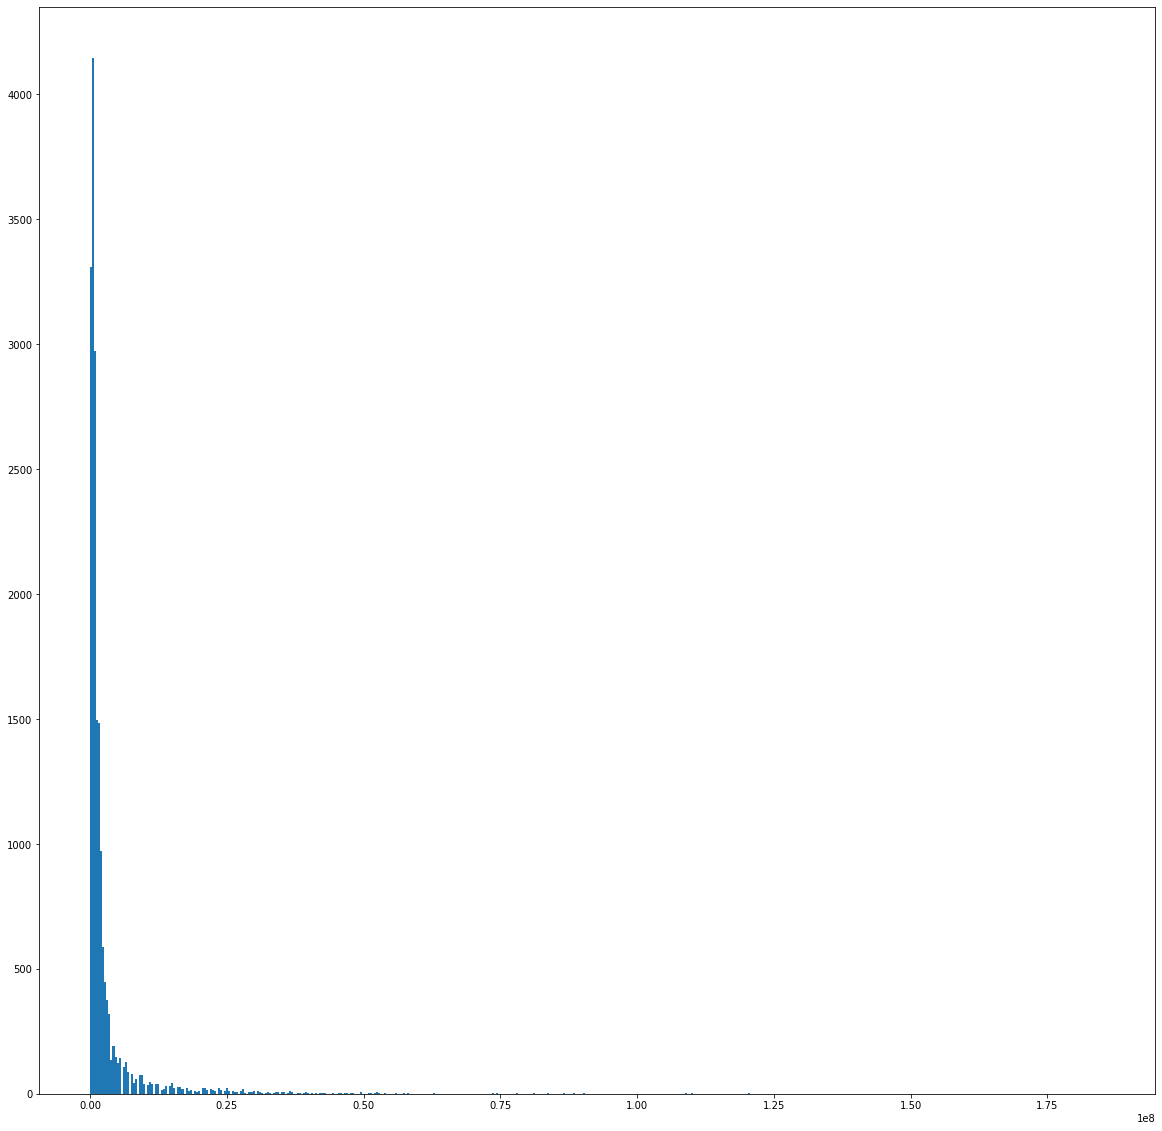

In [104]:
plt.figure(figsize=(20,20))
plt.hist(final_df["value"], bins=500)
plt.show()

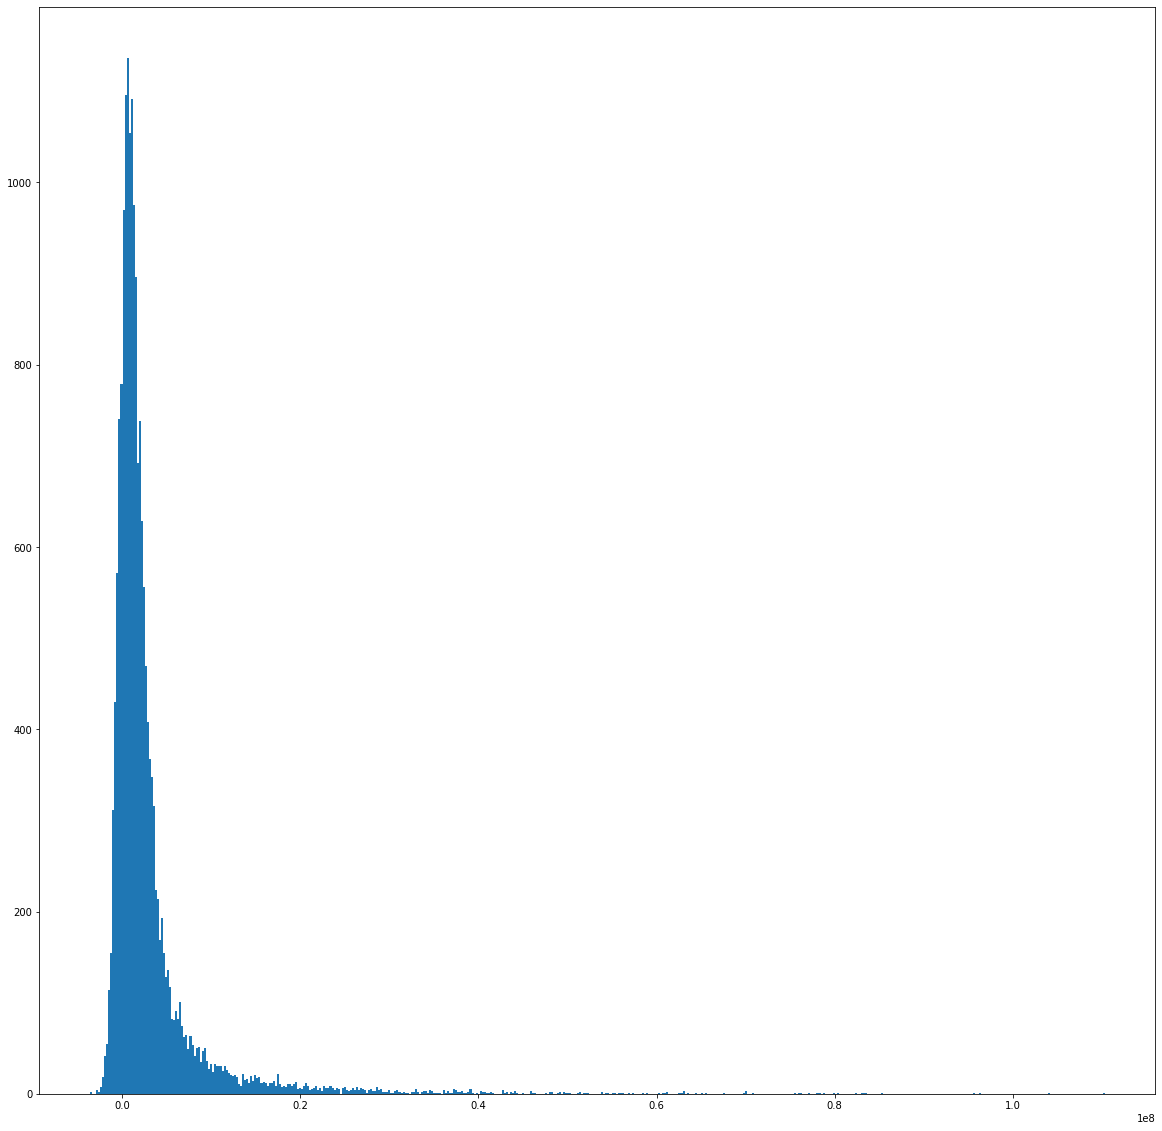

In [105]:
plt.figure(figsize=(20,20))
plt.hist(final_df["predicted_value"], bins=500)
plt.show()

In [136]:
pipeline.score(X_test.drop(columns=["short_name"]), y_test)

0.8939488705150009

In [170]:
-8.689771e+04

-86897.71

In [181]:
coefficients[coefficients["column"]=="club_LOSC Lille"]

column         coef     abs_coef
416  club_LOSC Lille  33721.30071  33721.30071

In [179]:
df[df["club"]=="LOSC Lille"]

short_name                      full_name  age dateOfBirth  height  \
227        M. Maignan                   Mike Maignan   25  1995-07-03     190   
481          B. André                 Benjamin André   30  1990-08-03     180   
531          J. Ikoné        Nanitamo Jonathan Ikoné   22  1998-05-02     175   
540    Renato Sanches      Renato Júnior Luz Sanches   23  1997-08-18     175   
561          J. Bamba                 Jonathan Bamba   24  1996-03-26     175   
676         B. Yılmaz                   Burak Yılmaz   35  1985-07-15     188   
710         Y. Yazıcı                   Yusuf Yazıcı   23  1997-01-29     185   
740          Z. Çelik              Mehmet Zeki Çelik   23  1997-02-17     180   
877        José Fonte     José Miguel da Rocha Fonte   37  1983-12-22     190   
905          J. David       Jonathan Christian David   21  2000-01-14     178   
1068         J. David       Jonathan Christian David   21  2000-01-14     178   
1278             Xeka    iguel Ângelo da Silva Rocha   26  1994-11-10     185   
1343      Luiz Araújo  Luiz de Araujo Guimarães Neto   24  1996-06-02     175   
1421       B. Soumaré              Boubakary Soumaré   21  1999-02-27     188   
1422      O. Karnezis               Orestis Karnezis   35  1985-07-11     190   
1528         Reinildo        Reinildo Isnard Mandava   27  1994-01-21     180   
1709      D. Bradarić               Domagoj Bradarić   21  1999-12-10     178   
2344        S. Botman                    Sven Botman   21  2000-01-12     193   
2811          J. Pied                    Jérémy Pied   31  1989-02-23     173   
4930          T. Weah                    imothy Weah   20  2000-02-22     183   
5262      Tiago Djaló     Tiago Emanuel Embaló Djaló   20  2000-04-09     190   
9350       I. Lihadji                  Isaac Lihadji   18  2002-04-10     178   
11137    H. Ouro-Sama                Hakim Ouro-Sama   23  1997-12-28     185   
12439       C. Niasse      heikh Ahmet Tidian Niasse   21  2000-01-19     188   
13321        A. Zekaj                    Arton Zekaj   20  2000-04-16     188   
14393    L. Chevalier                Lucas Chevalier   19  2001-11-06     193   
15708     I. Ouattara                Fadiga Ouattara   20  2001-01-18     183   
16018      E. Pizzuto           Eugenio Pizzuto Puga   18  2002-05-13     178   
16221         M. Kapı                    ustafa Kapı   18  2002-08-08     168   
16689    N. Innocenti               Nassim Innocenti   18  2002-02-19     188   

       weight            positions        club  contract_valid_until  \
227        91               ['GK']  LOSC Lille                  2022   
481        74        ['CDM', 'CM']  LOSC Lille                  2023   
531        73  ['RM', 'CAM', 'ST']  LOSC Lille                  2023   
540        70         ['CM', 'RM']  LOSC Lille                  2023   
561        70               ['LM']  LOSC Lille                  2023   
676        77               ['ST']  LOSC Lille                  2022   
710        74        ['CAM', 'RM']  LOSC Lille                  2024   
740        78               ['RB']  LOSC Lille                  2023   
877        84               ['CB']  LOSC Lille                  2021   
905        77        ['ST', 'CAM']  LOSC Lille                  2025   
1068       77        ['ST', 'CAM']  LOSC Lille                  2025   
1278       83        ['CDM', 'CM']  LOSC Lille                  2022   
1343       70         ['RM', 'LM']  LOSC Lille                  2022   
1421       82        ['CDM', 'CM']  LOSC Lille                  2022   
1422       81               ['GK']  LOSC Lille                  2023   
1528       73               ['LB']  LOSC Lille                  2022   
1709       69               ['LB']  LOSC Lille                  2024   
2344       81               ['CB']  LOSC Lille                  2025   
2811       73         ['RB', 'LB']  LOSC Lille                  2022   
4930       66         ['ST', 'LM']  LOSC Lille             